# Question 2  (Kolmogorov-Smirnov Test)

## Background

We aim to explore how various **external factors** (e.g. hours, seasons) might impact the popularity of cycling in London.

## Problem Definition

<div>
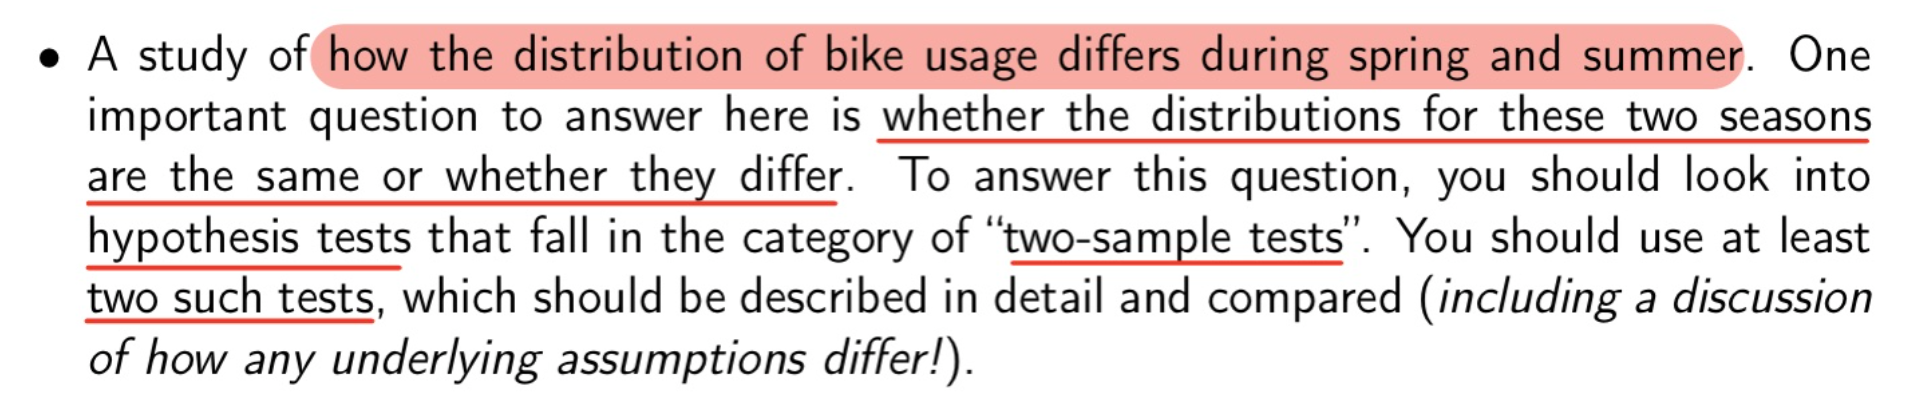
</div>

We are investigating whether the **distribution of the bike usage in spring** is different from the **distribution of the bike usage in summer**.

That is, assuming the **observed samples of bike usage** in spring and summer are **independently obtained** from their own **populations**, we aim to determine whether the **differnce** between these 2 populations is **statistically significant**.

To compare 2 distributions, we need to consider not only the **sample means** but also other related statstics (e.g. **varaince**, median, quantile). Unlike the sample means which can be compared using a **Two-Sample t-Test** where the **central limited theorem** applies, **sample varainces** cannot be compared using the same test (because **CLT does not apply**).

Therefore, we need to consider other tests:

- **Kolmogorov–Smirnov Test**
- **Permutation Test**

## Kolmogorov-Smirnov Test

The **`Kolmogorov-Smirnov (K-S) test`** tests whether two arbitrary **distributions** are the same.

It is a **non-parametric test** where we do not have to assume the samples are **normally distributed** as we do in **t-Tests**. 

The **K-S test** works by comparing the **empirical cumulative distribution functions** (ECDFs) between:

- a sample distribution and a theoretical distribution (e.g. normal) -> **one-sample K-S test**
- two sample distributions -> **two-sample K-S test**

The ECDFs are the **observed** CDFs from the samples, for example, for $X_1, X_2, ... , X_n$ being **independent and indentically distributed** random variables, the ECDF is given as:

$$F_{n}(t)=\frac{\text{number of samples ≤ t}}{sample size}$$

By comparing the the two ECDFs, we obtain a **value D** which is the **maximum distance** between the two curves. This is the **test statistic** of the K-S test where the **hull hypothesis** usually claims it as zero:

$$H_0: \text{two distributions are the same (D=0)}$$
$$H_1: \text{two distributions are different (D>0)}$$

Since D is the distance between CDFs, the **values of D** varies between the range of **[0,1]**.

The **null hypothesis** is **rejected** when we have: 

$$D>\sqrt{-\frac{1}{2}ln(\alpha)\frac{n+m}{nm}}$$

where $D$ is the **observed test statistic** from the samples, $\sqrt{-\frac{1}{2}ln(\alpha)\frac{n+m}{nm}}$ is the **critical value** of D given the **significance level** $\alpha$ and the **sample sizes** $m$ and $n$.


However, these only applies when the samples are following **continuous distributions** which is not the case with **bike usage**. If we still use the above method to compute our **critical value** and **p-value**, we will be testing under an actual significance level less that $\alpha$. This is because that we will be constructing an $\alpha$ level test **assuming the distirbutions are continuous** while they are **discrete**. This is undesired, therefore, we need to adopt another method to find suitable critical values and p-values: through **simulation using perumutation tests**.




**Assumptions** made:

- $H_0$: both samples are randomly drawn from the same distribution
- the samples are **independent and indentically distributed** random variables
- the two samples are **mutually independent**

**Limitations** of a two-sample K-S test:

- the test is **less sensitive** to the differences in the **tails** of the distributions

Compare to a **two-sample t-test**:

- a two-sample t-test only compares the **mean** of the two distributions
- a two-sample K-S test is sentitve to **any differences**, for example: 2 distributions with the **same mean** but significantly **different shapes** will produce a large value of D

**Useful Materials**:

- https://www.mit.edu/~6.s085/notes/lecture5.pdf
- https://www.astro.umd.edu/~miller/teaching/astrostat/lecture09.pdf
- https://webspace.maths.qmul.ac.uk/b.bogacka/CTS_Chapter3_Students.pdf
- https://towardsdatascience.com/how-to-compare-two-distributions-in-practice-8c676904a285
- https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5
- https://stats.stackexchange.com/questions/1047/is-kolmogorov-smirnov-test-valid-with-discrete-distributions#:~:text=It%20does%20not%20apply%20to%20discrete%20distributions

## Import Data

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from scipy.stats import ks_2samp

from tqdm import tqdm

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [7]:
df_hour = pd.read_csv('hour.csv')
df_day = pd.read_csv('day.csv')

## Data Preprocess

- no missing values
- no duplicated values
- no obvious outliers

We split the data into **two groups**: spring and summer.

In [8]:
df_day_spring = df_day[df_day['season']==2].copy()
df_day_summer = df_day[df_day['season']==3].copy()

## Data Exploration

1. compute the **mean values**
2. **visualize** the two distributions

In [10]:
print('The mean daily bike usage in spring is: ', round(df_day_spring['cnt'].mean()))
print('The mean daily bike usage in summer is: ', round(df_day_summer['cnt'].mean()))

The mean daily bike usage in spring is:  4992
The mean daily bike usage in summer is:  5644


In [23]:
import scipy

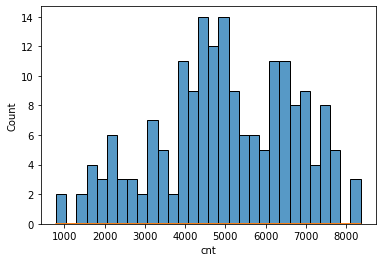

In [31]:
mu, sigma = scipy.stats.norm.fit(df_day_spring['cnt'])
_, bins, _ = plt.hist(df_day_spring['cnt'], 20, density=1, alpha=0.5)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
sns.histplot(df_day_spring['cnt'], bins=30)
plt.plot(bins, best_fit_line)
plt.show()

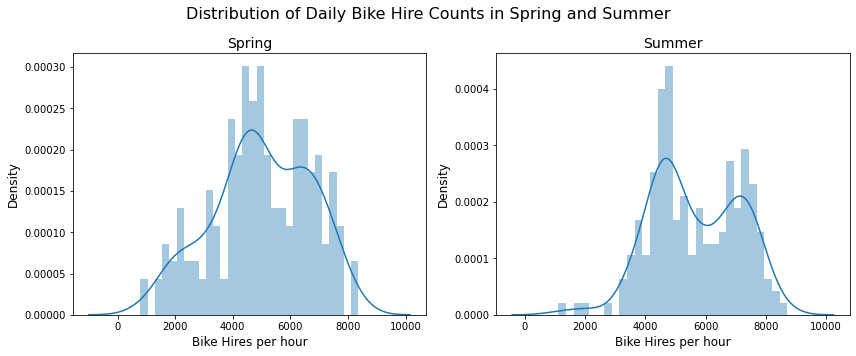

In [39]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df_day_spring['cnt'], bins=30)
plt.title('Spring', fontsize=14)
plt.ylabel('Density', fontsize=12)
plt.xlabel('Bike Hires per hour', fontsize=12)

plt.subplot(1, 2, 2)
sns.distplot(df_day_summer['cnt'], bins=30)
plt.title('Summer', fontsize=14)
plt.ylabel('Density', fontsize=12)
plt.xlabel('Bike Hires per hour', fontsize=12)

fig.suptitle('Distribution of Daily Bike Hire Counts in Spring and Summer', fontsize=16)
plt.tight_layout()
plt.show()

Title: Distribution of Daily Bike Hire Counts in Spring and Summer
- I would take out season=3 and replace with Summer directly
- andjust x and y axis label to e.g. x="Bike Hires per hour" and y="Frequency"
- maybe you can add a red line at the location where the mean is

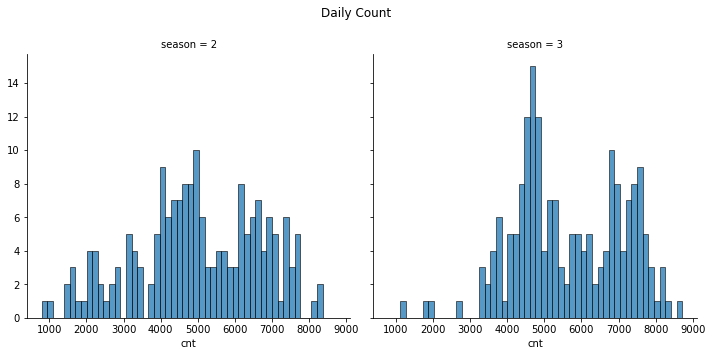

In [6]:
g = sns.FacetGrid(df_day[df_day['season'].isin([2,3])], col='season', height=5)
g.map(sns.histplot, 'cnt', bins=50)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Daily Count')
plt.show()

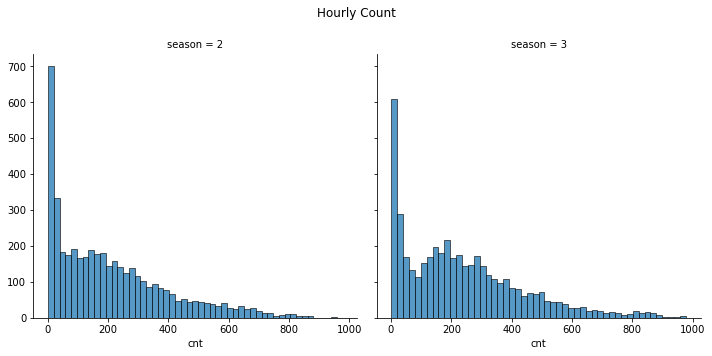

In [7]:
g = sns.FacetGrid(df_hour[df_hour['season'].isin([2,3])], col='season', height=5)
g.map(sns.histplot, 'cnt', bins=50)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Hourly Count')
plt.show()

## Implementation of the Two-Sample K-S Test

1. set a **significance level** of the test
2. compute the **critical value** for the test statistic at this level
3. plot the **empirical cumulative distribution functions** 
4. carry out the **2-sample K-S test**, obtain the **test statistic** and the **p-value**
5. plot the **observed test statistic** and the **distribution of the test statistic**

In [29]:
def KS_test(A, B, alpha, permutation_size): 
    
    #compute the observed value of test statistic D from the samples
    samples = np.append(A,B)
    samples = sorted(samples)
    freq_A, freq_B = [], []
    for x in samples:
        freq_A.append(len([sample for sample in A if sample <=x])/len(A))
        freq_B.append(len([sample for sample in B if sample <=x])/len(B))
    d = max(abs(np.array(freq_A)-np.array(freq_B)))
    idx = np.argmax(abs(np.array(freq_A)-np.array(freq_B)))
    
    #plot the empirical cumulative distribution functions of the two samples
    fig = plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(sorted(samples), freq_A, label='Spring')
    plt.plot(sorted(samples), freq_B, label='Summer')
    #plt.axvline(x=samples[idx], ymin=freq_B[idx]+0.036, ymax=freq_A[idx]+0.01, color='r', label='observed statistic')
    plt.title('Empirical Cumulative Distribution Functions', fontsize=15)
    plt.ylabel('Probability', fontsize=12)
    plt.xlabel('Bike Usage', fontsize=12)
    plt.legend() 
    
    #simulation using permutation tests
    np.random.seed(0)
    samples = np.append(A, B)
    D_list = []
    for _ in tqdm(range(permutation_size)):
        perm_samples = np.random.permutation(samples)
        new_A, new_B = perm_samples[:len(A)], perm_samples[len(A):]
        freq_A, freq_B = [], []
        for x in samples:
            freq_A.append(len([sample for sample in new_A if sample <=x])/len(A))
            freq_B.append(len([sample for sample in new_B if sample <=x])/len(B))
        D = max(abs(np.array(freq_A)-np.array(freq_B)))
        D_list.append(D)
    D_critical = sorted(D_list)[round((1-alpha/2)*len(D_list))]
    p_value = len([x for x in D_list if x > d]) / len(D_list)
    
    #print the test information and results
    print('The significance level of the test is: ', alpha)
    print(f'The observed test statistic is: {round(d,8)}')
    print('The two-sided critical value of the test statistic D at the level of 5% is: ', round(D_critical, 8))
    print(f'The two-sided p-value is: {round(p_value,8)}')
    print()
    
    #plot the distribution of the test statistic D
    plt.subplot(1,2,2)
    sns.distplot(D_list, bins=20)
    plt.axvline(d, color='r', label='Observed D')
    plt.title('Distribution of the Test Statistic D', fontsize=15)
    plt.legend()
    plt.show()

## Test on Daily Count

In [7]:
from scipy.stats import ks_2samp

A = df_day_spring['cnt']
B = df_day_summer['cnt']
ks_2samp(A, B)

KstestResult(statistic=0.1822386679000925, pvalue=0.003440766273234752)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:11<00:00, 44.91it/s]


The significance level of the test is:  0.05
The observed test statistic is: 0.18223867
The two-sided critical value of the test statistic D at the level of 5% is:  0.15124884
The two-sided p-value is: 0.006



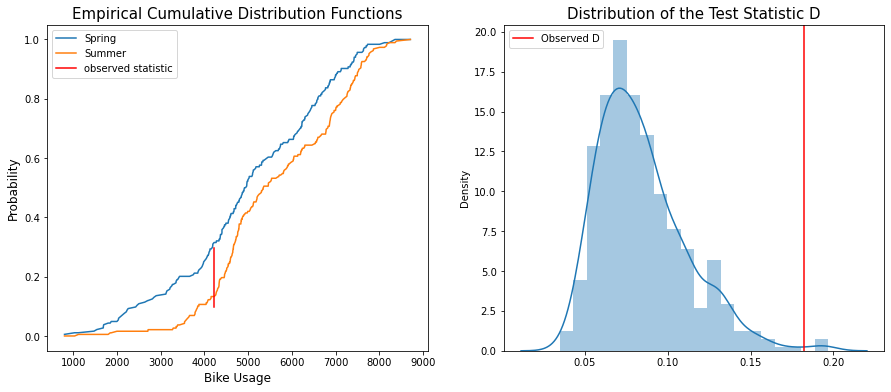

In [11]:
A = df_day_spring['cnt']
B = df_day_summer['cnt']
KS_test(A, B, 0.05, 500)

Since we obtained a test statistic **larger** than the critical value and a p-value **smaller** than the significance level, we **reject the null hypothesis**.

AS expected, the **observed D value** is almost outside of the **distribution of the test statistic** suggesting that the probability of observing the **observed D value** is very small (smaller than the **significance level**).

## Test on Hourly Count

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [1:35:07<00:00, 11.41s/it]


The significance level of the test is:  0.05
The observed test statistic is: 0.07853124
The two-sided critical value of the test statistic D at the level of 5% is:  0.03120674
The two-sided p-value is: 0.0



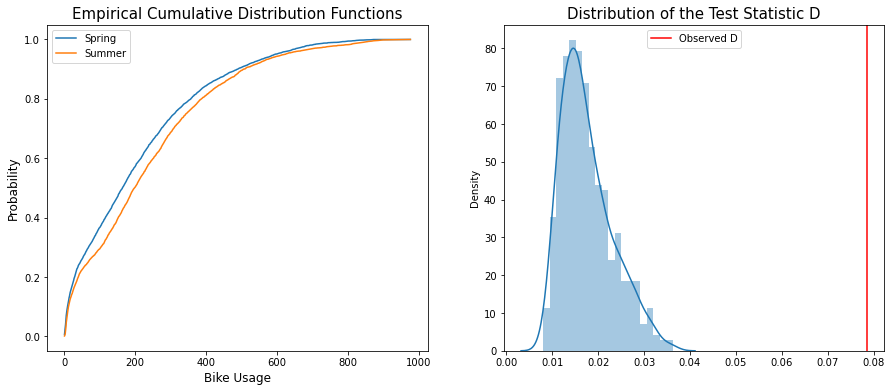

In [468]:
A = df_hour_spring['cnt']
B = df_hour_summer['cnt']
KS_test(A, B, 0.05, 500)

## Conclusions

1. Are the two distributions (spring & summer) of bike usage different?

- Yes, we **rejected the $H_0$** at $\alpha=5%$

2. If yes, how are the distributions different?

- The **average bike usage** in summer is higher than that in spring
- The distributions of **registered bike usage** differ the most
- further breakdown...

3. What do the above observations mean? Any advice?

- 

4. Limitations of the analysis:

- 

5. ...